In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# READING DATA

In [3]:
df = pd.read_csv('C:\\Users\\sunda\\OneDrive\\Desktop\\Blood Pressure.csv')


In [4]:
#Showing the complete dataset
df

,Age,Gender,BMI,Smoking,Daily steps,Daily alcohol,Daily salt,Stress Level,Hypertension
0,51,M,24.0,NO,5000,250,3.00,HIGH,YES
1,53,F,23.8,NO,4900,NO,2.95,LOW,YES
2,55,M,23.6,YES,4800,350,2.90,HIGH,YES
3,57,F,23.4,NO,4700,251,2.85,MEDIUM,YES
4,59,M,23.2,NO,4600,NO,2.80,LOW,NO
...,...,...,...,...,...,...,...,...,...
495,91,F,20.0,YES,3000,356,2.00,LOW,NO
496,93,M,19.8,NO,2900,257,1.95,LOW,NO
497,95,F,19.6,NO,2800,NO,1.90,LOW,NO
498,97,M,19.4,YES,2700,357,1.85,LOW,NO


In [5]:

df["Gender"].replace({'M':1,'F':0},inplace=True)

In [6]:
print(df)

     Age  Gender   BMI Smoking  Daily steps Daily alcohol  Daily salt  \
0     51       1  24.0      NO         5000           250        3.00   
1     53       0  23.8      NO         4900            NO        2.95   
2     55       1  23.6     YES         4800           350        2.90   
3     57       0  23.4      NO         4700           251        2.85   
4     59       1  23.2      NO         4600            NO        2.80   
..   ...     ...   ...     ...          ...           ...         ...   
495   91       0  20.0     YES         3000           356        2.00   
496   93       1  19.8      NO         2900           257        1.95   
497   95       0  19.6      NO         2800            NO        1.90   
498   97       1  19.4     YES         2700           357        1.85   
499   99       0  19.2      NO         2600           258        1.80   

    Stress Level Hypertension  
0           HIGH          YES  
1            LOW          YES  
2           HIGH          Y

In [7]:
df.head()

,Age,Gender,BMI,Smoking,Daily steps,Daily alcohol,Daily salt,Stress Level,Hypertension
0,51,1,24.0,NO,5000,250,3.00,HIGH,YES
1,53,0,23.8,NO,4900,NO,2.95,LOW,YES
2,55,1,23.6,YES,4800,350,2.90,HIGH,YES
3,57,0,23.4,NO,4700,251,2.85,MEDIUM,YES
4,59,1,23.2,NO,4600,NO,2.80,LOW,NO


In [8]:
df["Stress Level"].replace({'HIGH':2,'LOW':0,'MEDIUM':1},inplace=True)
df['Hypertension'].replace({'NO':0,'YES':1},inplace=True)
df['Smoking'].replace({'YES':1,'NO':0},inplace=True)
df['Daily alcohol'].replace({'NO':0},inplace=True)

In [9]:
df.tail()

,Age,Gender,BMI,Smoking,Daily steps,Daily alcohol,Daily salt,Stress Level,Hypertension
495,91,0,20.0,1,3000,356,2.00,0,0
496,93,1,19.8,0,2900,257,1.95,0,0
497,95,0,19.6,0,2800,0,1.90,0,0
498,97,1,19.4,1,2700,357,1.85,0,0
499,99,0,19.2,0,2600,258,1.80,0,0


In [10]:
#Showing the number of rows and columns
df.shape

(500, 9)

In [11]:
#Showing the statistical measures of the data
df.describe()

,Age,Gender,BMI,Smoking,Daily steps,Daily salt,Stress Level,Hypertension
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,75.000000,0.5200,21.600000,0.320000,3800.000000,2.400000,0.880000,0.600000
std,14.436649,0.5001,1.443665,0.466943,721.832449,0.360916,0.840841,0.490389
min,51.000000,0.0000,19.200000,0.000000,2600.000000,1.800000,0.000000,0.000000
25%,63.000000,0.0000,20.400000,0.000000,3200.000000,2.100000,0.000000,0.000000
50%,75.000000,1.0000,21.600000,0.000000,3800.000000,2.400000,1.000000,1.000000
75%,87.000000,1.0000,22.800000,1.000000,4400.000000,2.700000,2.000000,1.000000
max,99.000000,1.0000,24.000000,1.000000,5000.000000,3.000000,2.000000,1.000000


In [12]:
#Showing some extra information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            500 non-null    int64  
 1   Gender         500 non-null    int64  
 2   BMI            500 non-null    float64
 3   Smoking        500 non-null    int64  
 4   Daily steps    500 non-null    int64  
 5   Daily alcohol  500 non-null    object 
 6   Daily salt     500 non-null    float64
 7   Stress Level   500 non-null    int64  
 8   Hypertension   500 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 35.3+ KB


In [13]:
df.isnull().sum()

Age              0
Gender           0
BMI              0
Smoking          0
Daily steps      0
Daily alcohol    0
Daily salt       0
Stress Level     0
Hypertension     0
dtype: int64

In [14]:
df

,Age,Gender,BMI,Smoking,Daily steps,Daily alcohol,Daily salt,Stress Level,Hypertension
0,51,1,24.0,0,5000,250,3.00,2,1
1,53,0,23.8,0,4900,0,2.95,0,1
2,55,1,23.6,1,4800,350,2.90,2,1
3,57,0,23.4,0,4700,251,2.85,1,1
4,59,1,23.2,0,4600,0,2.80,0,0
...,...,...,...,...,...,...,...,...,...
495,91,0,20.0,1,3000,356,2.00,0,0
496,93,1,19.8,0,2900,257,1.95,0,0
497,95,0,19.6,0,2800,0,1.90,0,0
498,97,1,19.4,1,2700,357,1.85,0,0


In [15]:
df.isnull().sum()

Age              0
Gender           0
BMI              0
Smoking          0
Daily steps      0
Daily alcohol    0
Daily salt       0
Stress Level     0
Hypertension     0
dtype: int64

DATA VISUALISATION

In [16]:
import seaborn as sns
sns.set()

In [17]:
df['Gender'].value_counts()

1    260
0    240
Name: Gender, dtype: int64

C:\Users\sunda\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

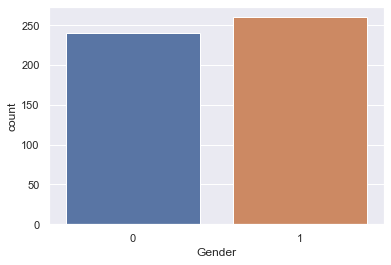

In [18]:
#Making a count plot for Gender column
sns.countplot('Gender', data = df) 

In [19]:
df['Daily salt'].value_counts()

3.00    20
2.35    20
1.85    20
1.90    20
1.95    20
2.00    20
2.05    20
2.10    20
2.15    20
2.20    20
2.25    20
2.30    20
2.40    20
2.95    20
2.45    20
2.50    20
2.55    20
2.60    20
2.65    20
2.70    20
2.75    20
2.80    20
2.85    20
2.90    20
1.80    20
Name: Daily salt, dtype: int64

C:\Users\sunda\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Daily salt', ylabel='count'>

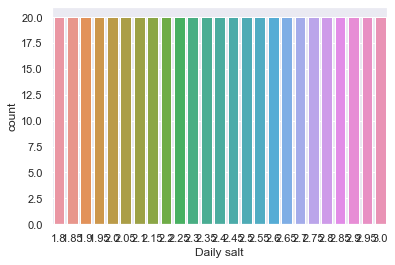

In [20]:
#Making a count plot for Daily salt column
sns.countplot('Daily salt', data = df)

In [21]:
df['Stress Level'].value_counts()

0    210
2    150
1    140
Name: Stress Level, dtype: int64

C:\Users\sunda\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stress Level', ylabel='count'>

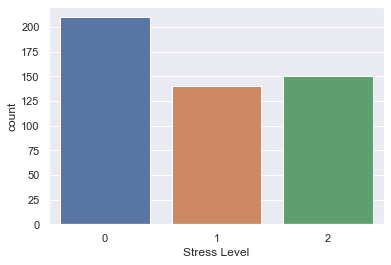

In [22]:
#Making a count plot for Stress Level column
sns.countplot('Stress Level', data = df)

In [23]:
df.head()

,Age,Gender,BMI,Smoking,Daily steps,Daily alcohol,Daily salt,Stress Level,Hypertension
0,51,1,24.0,0,5000,250,3.00,2,1
1,53,0,23.8,0,4900,0,2.95,0,1
2,55,1,23.6,1,4800,350,2.90,2,1
3,57,0,23.4,0,4700,251,2.85,1,1
4,59,1,23.2,0,4600,0,2.80,0,0


In [24]:
df['Smoking'].value_counts()

0    340
1    160
Name: Smoking, dtype: int64

C:\Users\sunda\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Smoking', ylabel='count'>

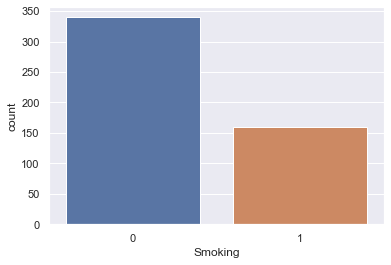

In [25]:
#Making a count plot for Smoking column
sns.countplot('Smoking', data = df)

In [26]:
df['BMI'].value_counts()

24.0    20
21.4    20
19.4    20
19.6    20
19.8    20
20.0    20
20.2    20
20.4    20
20.6    20
20.8    20
21.0    20
21.2    20
21.6    20
23.8    20
21.8    20
22.0    20
22.2    20
22.4    20
22.6    20
22.8    20
23.0    20
23.2    20
23.4    20
23.6    20
19.2    20
Name: BMI, dtype: int64

C:\Users\sunda\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI', ylabel='count'>

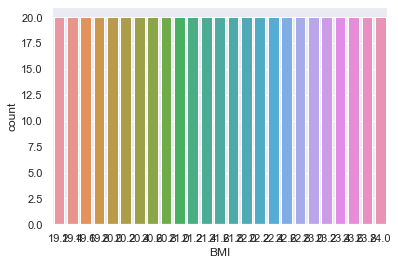

In [27]:
#Making a count plot for smoking_status column
sns.countplot('BMI', data = df)

In [28]:
df['Hypertension'].value_counts()
#0 represents No Hypertension
#1 represents Hypertension

1    300
0    200
Name: Hypertension, dtype: int64

C:\Users\sunda\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hypertension', ylabel='count'>

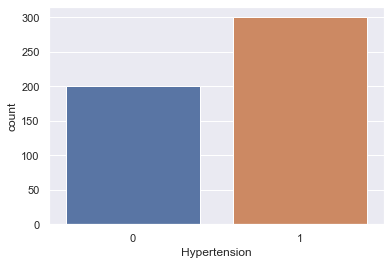

In [29]:
#Making a count plot for hypertension column
sns.countplot('Hypertension', data = df)

C:\Users\sunda\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

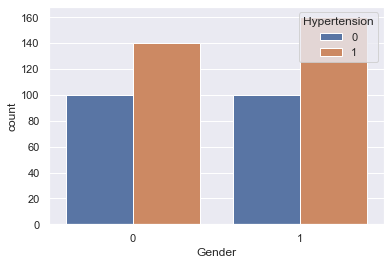

In [30]:
#Showing heart disease and no heart disease genderwise
sns.countplot('Gender', hue ='Hypertension', data = df)

In [31]:
df.head()

,Age,Gender,BMI,Smoking,Daily steps,Daily alcohol,Daily salt,Stress Level,Hypertension
0,51,1,24.0,0,5000,250,3.00,2,1
1,53,0,23.8,0,4900,0,2.95,0,1
2,55,1,23.6,1,4800,350,2.90,2,1
3,57,0,23.4,0,4700,251,2.85,1,1
4,59,1,23.2,0,4600,0,2.80,0,0


In [32]:
#Seperating the data and labels
X = df.iloc[:,:-1]
y = df['Hypertension']


In [33]:
X

,Age,Gender,BMI,Smoking,Daily steps,Daily alcohol,Daily salt,Stress Level
0,51,1,24.0,0,5000,250,3.00,2
1,53,0,23.8,0,4900,0,2.95,0
2,55,1,23.6,1,4800,350,2.90,2
3,57,0,23.4,0,4700,251,2.85,1
4,59,1,23.2,0,4600,0,2.80,0
...,...,...,...,...,...,...,...,...
495,91,0,20.0,1,3000,356,2.00,0
496,93,1,19.8,0,2900,257,1.95,0
497,95,0,19.6,0,2800,0,1.90,0
498,97,1,19.4,1,2700,357,1.85,0


In [34]:
y

0      1
1      1
2      1
3      1
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Hypertension, Length: 500, dtype: int64

In [35]:
#Data standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
standard = scaler.transform(X)
X = standard

In [36]:
X

array([[-1.66410059,  0.96076892,  1.66410059, ...,  0.31081783,
         1.66410059,  1.33333333],
       [-1.52542554, -1.040833  ,  1.52542554, ..., -1.39922744,
         1.52542554, -1.04761905],
       [-1.38675049,  0.96076892,  1.38675049, ...,  0.99483594,
         1.38675049,  1.33333333],
       ...,
       [ 1.38675049, -1.040833  , -1.38675049, ..., -1.39922744,
        -1.38675049, -1.04761905],
       [ 1.52542554,  0.96076892, -1.52542554, ...,  1.0427172 ,
        -1.52542554, -1.04761905],
       [ 1.66410059, -1.040833  , -1.66410059, ...,  0.36553928,
        -1.66410059, -1.04761905]])

In [37]:
y

0      1
1      1
2      1
3      1
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Hypertension, Length: 500, dtype: int64

SPLIT DATA IN TEST AND TRAIN FOR HYPERTENSION PREDICTION

In [38]:
#Train,Test,Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2)

In [39]:
from sklearn import svm
model = svm.SVC(kernel = 'linear')

In [40]:
#Training the SVM Model
model.fit(X_train, y_train)

SVC(kernel='linear')

In [41]:
#Finding the accuracy score on train dataset
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [42]:
train_data_accuracy#Finding the accuracy score on test dataset


0.875

In [43]:
#Finding the accuracy score on test dataset
from sklearn.metrics import accuracy_score
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [44]:
test_data_accuracy

0.9

MODEL EVALUATION FOR HYPERTENSION PREDICTION

In [46]:
6#Predicting System
data = (51,1,24.0,0,5000,250,3.00,2)
#Converting to numpy array
data_array = np.asarray(data)

#Reshaping the array
data_reshape = data_array.reshape(1, -1)

#Standardizing the data
data_standard = scaler.transform(data_reshape)

prediction = model.predict(data_standard)

if(prediction[0] == 0):
    print('No Hypertension')
else:
    print('Hypertension')

Hypertension


C:\Users\sunda\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


SAVING THE TRAINED MODEL FOR HYPERTENSION PREDICTION

In [ ]:
import pickle
filename = 'hypertension_model.sav'
pickle.dump(model,open(filename,'wb'))

In [ ]:
#loading the saved model
loaded_model = pickle.load(open('hypertension_model.sav','rb'))

In [ ]:
input_data = (19273,35.0,82.99,30.6)
#Converting to numpy array
input_data_array = np.asarray(data)

#Reshaping the array
input_data_reshape = data_array.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshape)

if(prediction[0] == 0):
    print('No Hypertension')
else:
    print('Hypertension')